In [ ]:
import os
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Merge 12 months of sales data into a single csv file

In [ ]:
files =[file for file in os.listdir("/content/drive/My Drive/practicedatasets/Sales_Data")]
for file in files:
    print(file)

Sales_June_2019.csv
Sales_July_2019.csv
Sales_December_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_August_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_April_2019.csv
Sales_September_2019.csv
all_data.csv


In [ ]:
path = "/content/drive/My Drive/practicedatasets/Sales_Data"

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])

all_data.shape

(373700, 6)

##### convert it into dataset

In [ ]:
all_data.to_csv('/content/drive/My Drive/practicedatasets/Sales_Data/all_data.csv',index=False)

##### Data cleaning and formatting

In [ ]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [ ]:
all_data.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [ ]:
all_data = all_data.dropna(how='all')
all_data.shape

(372610, 6)

##### What is the best month for sale?

In [ ]:
'04/19/19 08:46'.split('/')[0]

'04'

In [ ]:
def month(x):
    return x.split('/')[0]

##### add month col

In [ ]:
all_data['Month']=all_data['Order Date'].apply(month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [ ]:
all_data['Month']=all_data['Month'].astype(object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
all_data['Month'].unique()

array(['06', 'Order Date', '07', '08', '12', '01', '03', '04', '05', '09',
       '02', '11', '10'], dtype=object)

In [ ]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

371900

In [ ]:
all_data=all_data[~filter]

In [ ]:
all_data.shape

(371900, 7)

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06


In [ ]:
all_data['Month']=all_data['Month'].astype(int)

In [ ]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [ ]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [ ]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [ ]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
sales               float64
dtype: object

In [ ]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99


In [ ]:
all_data.groupby('Month')['sales'].sum()

Month
1     3644513.46
2     4404044.84
3     5614200.76
4     6781340.48
5     6305213.50
6     5155604.52
7     5295551.52
8     4488935.76
9     4195120.26
10    7473453.76
11    6399206.40
12    9226886.68
Name: sales, dtype: float64

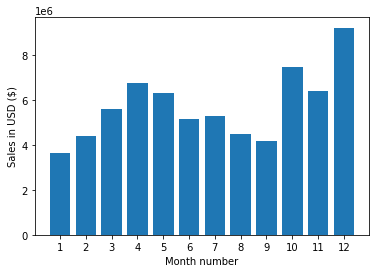

In [ ]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

##### Which city has max order?

In [ ]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [ ]:
def city(x):
    return x.split(',')[1]

In [ ]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [ ]:
all_data.groupby('city')['city'].count()

city
 Atlanta          29762
 Austin           19810
 Boston           39868
 Dallas           29640
 Los Angeles      59210
 New York City    49752
 Portland         24930
 San Francisco    89464
 Seattle          29464
Name: city, dtype: int64

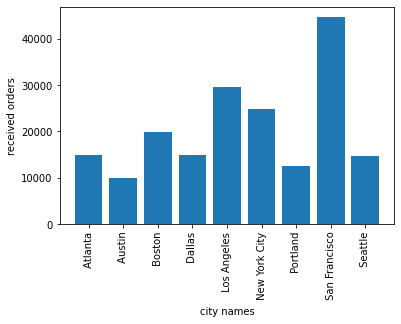

In [ ]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

##### What time should we display advertisements to maximize for product purchase?

In [ ]:
all_data['Order Date'][0].dtype

dtype('O')

In [ ]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [ ]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

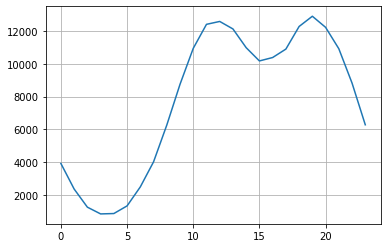

In [ ]:
plt.grid()
plt.plot(keys,hour)

##### Conclusion : between 12pm and 7pm is probably the best time to advertise to maximise product purchase

#### What product sold the most? &  Why?

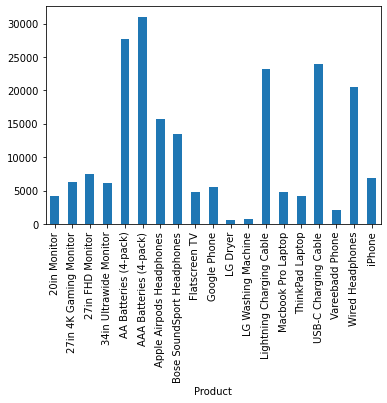

In [ ]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [ ]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [ ]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

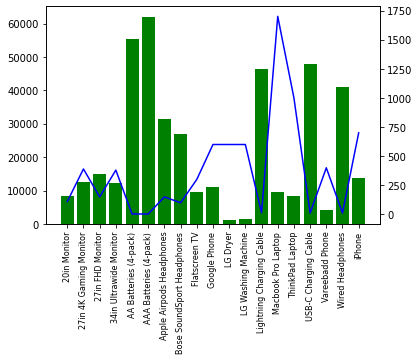

In [ ]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

#### Conclusion : The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.

In [ ]:
all_data.shape

(371900, 10)

#### What products are most often sold together?

#### note: keep orders that have same order Id,are sold mostly together

In [ ]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,Portland,19
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco,10
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles,20
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,Seattle,10
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco,18
5,209926,Apple Airpods Headphones,1,150.00,06/28/19 20:04,"386 Lake St, Seattle, WA 98101",6,150.00,Seattle,20
6,209927,Lightning Charging Cable,1,14.95,06/28/19 00:07,"29 Lincoln St, Los Angeles, CA 90001",6,14.95,Los Angeles,0
7,209928,Apple Airpods Headphones,1,150.00,06/16/19 21:30,"350 9th St, New York City, NY 10001",6,150.00,New York City,21
8,209929,Wired Headphones,1,11.99,06/28/19 10:56,"612 Meadow St, Portland, OR 97035",6,11.99,Portland,10
9,209930,27in FHD Monitor,1,149.99,06/02/19 11:22,"625 Ridge St, Los Angeles, CA 90001",6,149.99,Los Angeles,11


In [ ]:
#create grouped col
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [ ]:
df.shape

(371900, 11)

In [ ]:
#lets drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

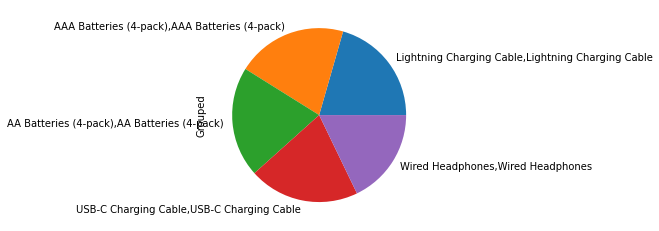

In [ ]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

In [ ]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [ ]:
iplot([trace])

####Conclusion : The most sold product is AAA Batteries.